# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 610


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key
# Define an empty list to fetch the weather data for each city
city_data = []
# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")
# Create counters
record_count = 1
set_count = 1
# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    # Add 1 to the record count
    record_count += 1
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | nar'yan-mar
Processing Record 2 of Set 1 | puerto natales
Processing Record 3 of Set 1 | cuajinicuilapa
Processing Record 4 of Set 1 | adamstown
Processing Record 5 of Set 1 | okha
Processing Record 6 of Set 1 | thompson
Processing Record 7 of Set 1 | yellowknife
Processing Record 8 of Set 1 | acarau
Processing Record 9 of Set 1 | richmond
Processing Record 10 of Set 1 | manaure
Processing Record 11 of Set 1 | ingeniero guillermo n. juarez
Processing Record 12 of Set 1 | tucurui
Processing Record 13 of Set 1 | invercargill
Processing Record 14 of Set 1 | alice springs
Processing Record 15 of Set 1 | bethel
Processing Record 16 of Set 1 | sinop
Processing Record 17 of Set 1 | bilibino
Processing Record 18 of Set 1 | broome
Processing Record 19 of Set 1 | cidreira
Processing Record 20 of Set 1 | georgetown
Processing Record 21 of Set 1 | usinsk
Processing Record 22 of Set 1 | atafu village
Processi

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()


City          581
Lat           581
Lng           581
Max Temp      581
Humidity      581
Cloudiness    581
Wind Speed    581
Country       581
Date          581
dtype: int64

In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,nar'yan-mar,67.6713,53.0870,20.34,74,100,1.86,RU,1690381951
1,puerto natales,-51.7236,-72.4875,0.24,86,52,1.44,CL,1690381951
2,cuajinicuilapa,16.4667,-98.4167,29.29,67,35,1.22,MX,1690381951
3,adamstown,-25.0660,-130.1015,20.37,67,55,10.20,PN,1690381952
4,okha,53.5739,142.9478,11.79,99,100,3.44,RU,1690381952


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

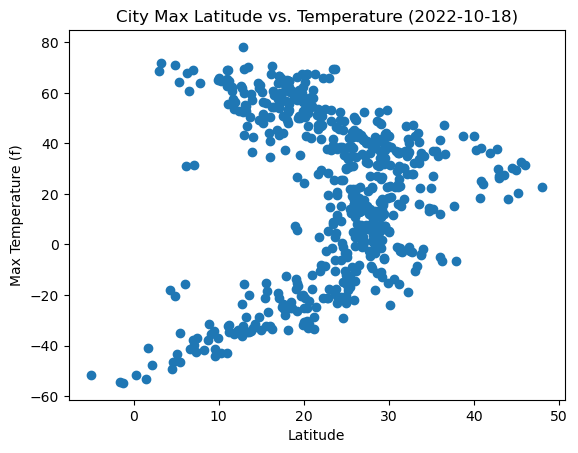

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Max Temp"], city_data_df["Lat"])

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (f)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

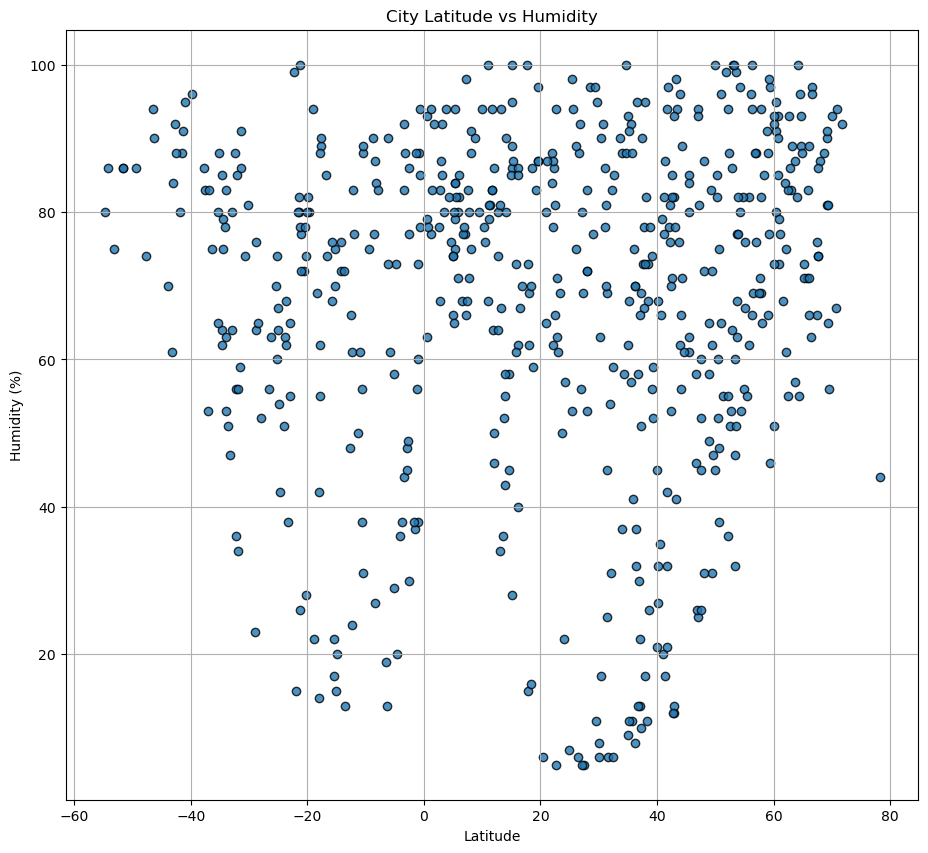

In [10]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]

# Incorporate the other graph properties
fig1, ax1 = plt.subplots(figsize=(11, 10))
plt.scatter(x_values, y_values, edgecolor="black", linewidth=1, marker="o", alpha=0.8)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs Humidity")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

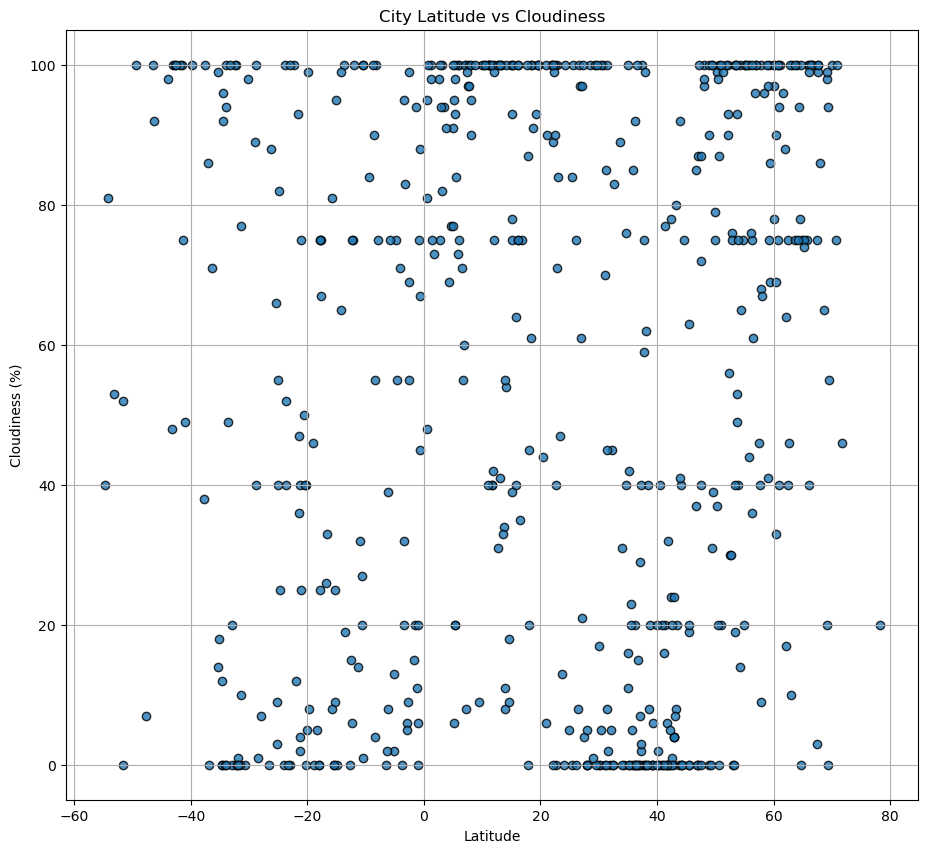

In [11]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]

# Incorporate the other graph properties
fig1, ax1 = plt.subplots(figsize=(11, 10))
plt.scatter(x_values, y_values, edgecolor="black", linewidth=1, marker="o", alpha=0.8)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs Cloudiness")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

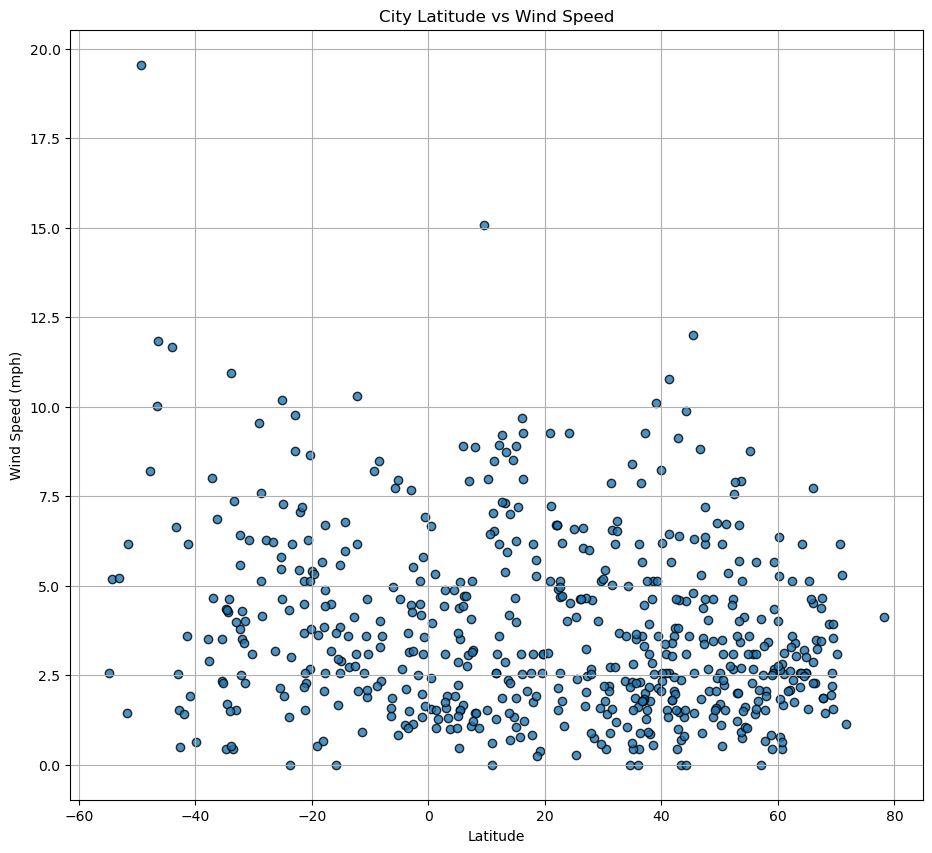

In [12]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]

# Incorporate the other graph properties
fig1, ax1 = plt.subplots(figsize=(11, 10))
plt.scatter(x_values, y_values, edgecolor="black", linewidth=1, marker="o", alpha=0.8)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude vs Wind Speed")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label, hemisphere, text_coordinates, ylim=None):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Get regression values
    regress_values = x_values * slope + intercept
    
    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    # Generate plots     
    fig1, ax1 = plt.subplots(figsize=(11,10))
    plt.scatter(x_values, y_values, edgecolor="black", linewidth=1, marker="o", alpha=0.8)
    plt.plot(x_values,regress_values,"r-")
    plt.title(f"{hemisphere} Hemisphere - {x_label} vs {y_label}",fontsize = 12)
    plt.xlabel(x_label,fontsize=12)
    plt.ylabel(y_label,fontsize=12)
    if ylim is not None:
        plt.ylim(0, ylim)
    plt.annotate(line_eq, text_coordinates, fontsize=20, color="red")

    # Print r square value
    print(f"The r-squared is: {rvalue**2}")

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,nar'yan-mar,67.6713,53.0870,20.34,74,100,1.86,RU,1690381951
2,cuajinicuilapa,16.4667,-98.4167,29.29,67,35,1.22,MX,1690381951
4,okha,53.5739,142.9478,11.79,99,100,3.44,RU,1690381952
5,thompson,55.7435,-97.8558,11.09,82,100,3.09,CA,1690381952
6,yellowknife,62.4560,-114.3525,18.29,55,75,5.14,CA,1690381741


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,puerto natales,-51.7236,-72.4875,0.24,86,52,1.44,CL,1690381951
3,adamstown,-25.0660,-130.1015,20.37,67,55,10.20,PN,1690381952
7,acarau,-2.8856,-40.1200,31.56,48,6,7.67,BR,1690381953
10,ingeniero guillermo n. juarez,-23.9000,-61.8500,17.84,63,100,4.33,AR,1690381953
11,tucurui,-3.7661,-49.6725,33.77,38,0,2.12,BR,1690381913


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.32605035363084456


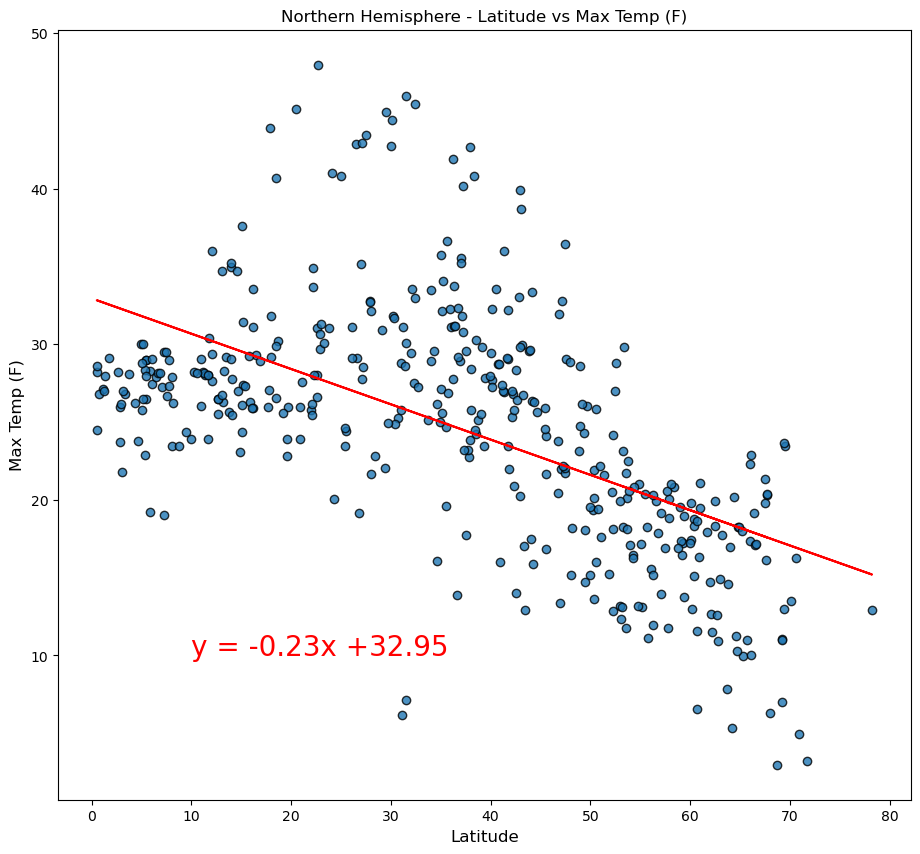

In [16]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Latitude", "Max Temp (F)", "Northern", (10, 10))

plt.savefig("./output_data/northern_lat_vs_max_temp.png", bbox_inches="tight")
plt.show()

The r-squared is: 0.7226624587108407


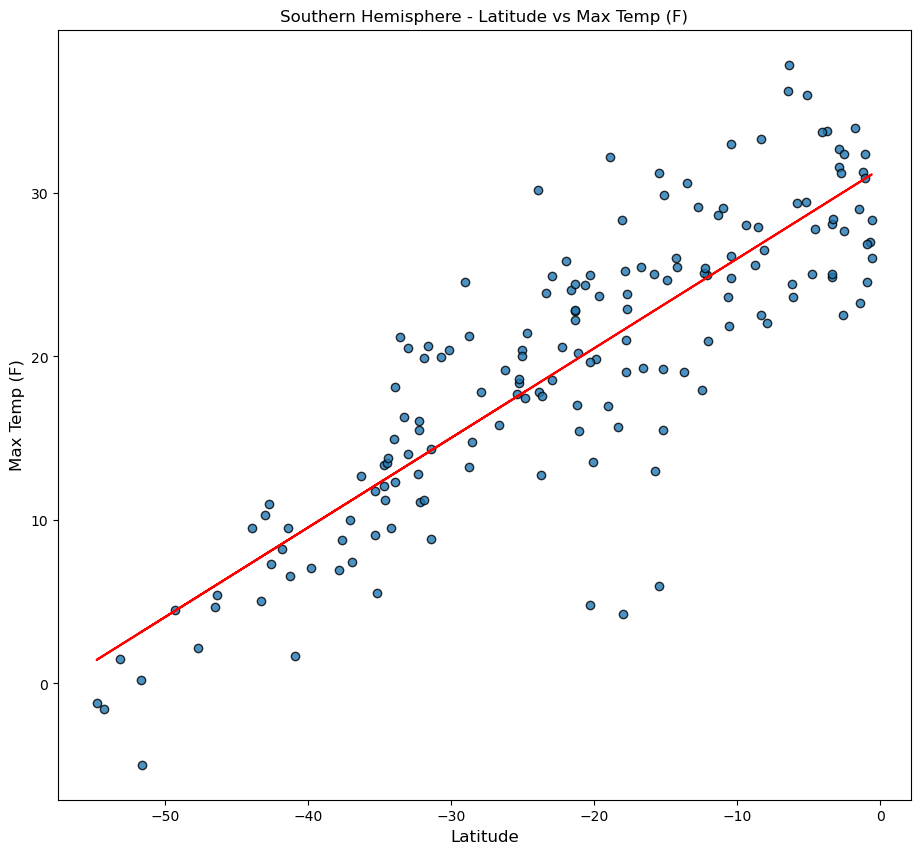

In [24]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Latitude", "Max Temp (F)", "Southern", (10, 10))

plt.savefig("./output_data/southern_lat_vs_max_temp.png", bbox_inches="tight")
plt.show()

**Discussion about the linear relationship:** The data shows that there is correlation between the max temperature of a country and it's proximity to the equator. The data strong shows that the closer you move to the equater the hotter the max temperatures will be. This correlation proves true whether you are on the northern or southern hemisphere of the world. 

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.0003224383833578118


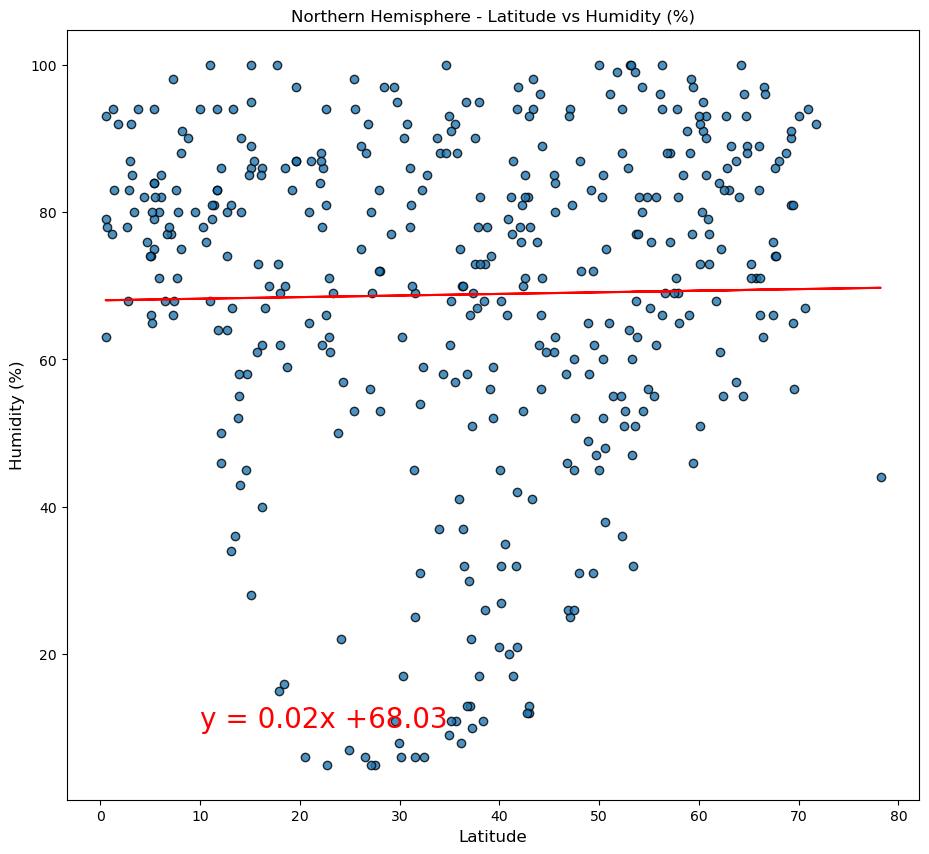

In [32]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
plot_linear_regression(x_values, y_values, "Latitude", "Humidity (%)", "Northern",(10,10))

plt.savefig("./output_data/northern_lat_vs_humidity.png", bbox_inches="tight")
plt.show()

The r-squared is: 0.0822784166956719


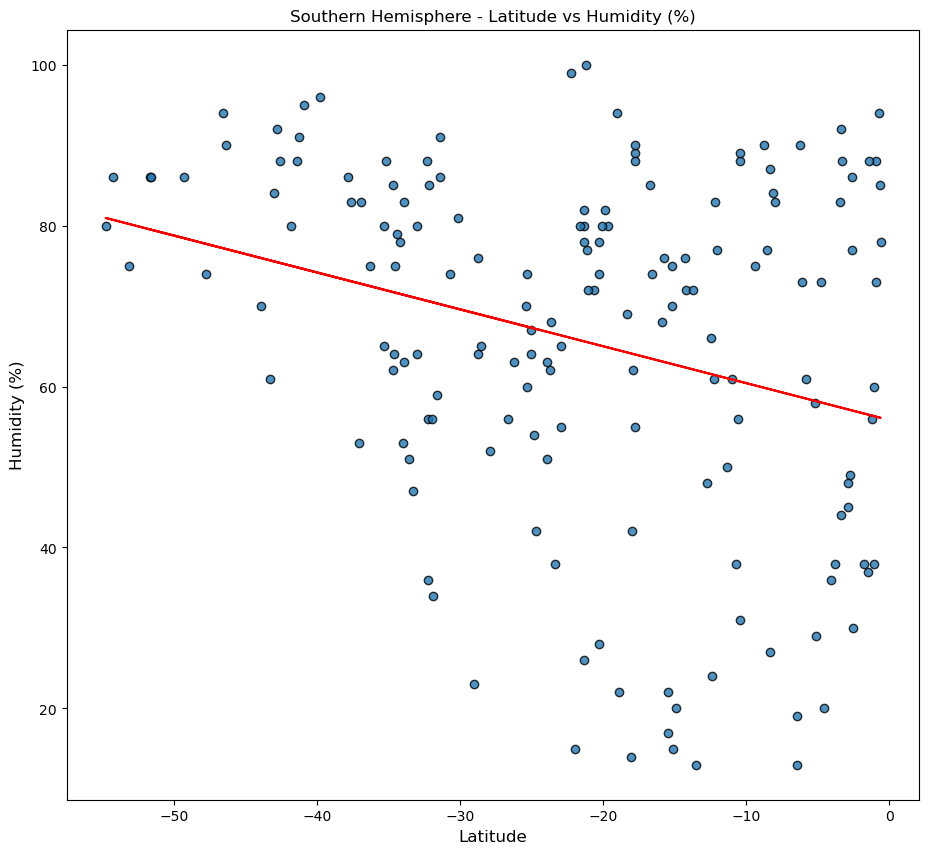

In [26]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
plot_linear_regression(x_values, y_values, "Latitude", "Humidity (%)", "Southern",(50, 50))

plt.savefig("./output_data/southern_lat_vs_humidity.png", bbox_inches="tight")
plt.show()

**Discussion about the linear relationship:** The data suggests that there is weak negative correlation on the amount of humidity there is the closer you get to the equator on both hemispheres of the world. The data makes sense as the closer you get to the equator the hotter it is and the less moisture there will be in the air, as water tends to evaporate the hotter it gets in temperature.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.0040299553113546625


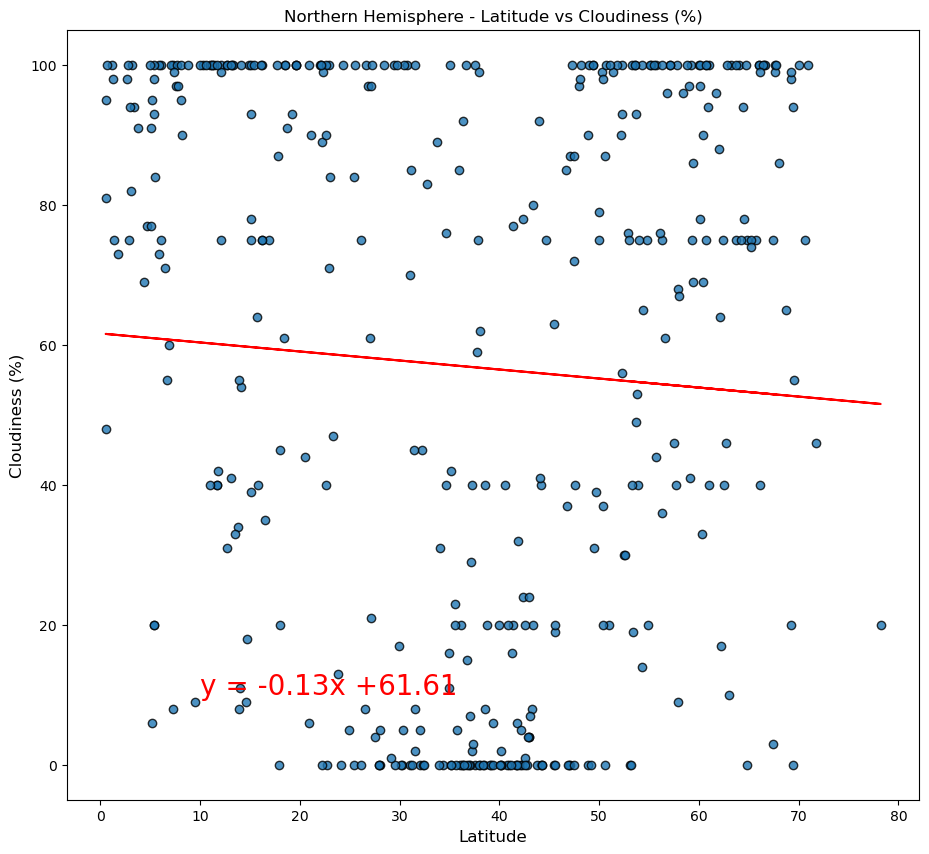

In [27]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
plot_linear_regression(x_values, y_values, "Latitude", "Cloudiness (%)", "Northern",(10,10))

plt.savefig("./output_data/northern_lat_vs_cloud.png", bbox_inches="tight")
plt.show()

The r-squared is: 0.020924374892342265


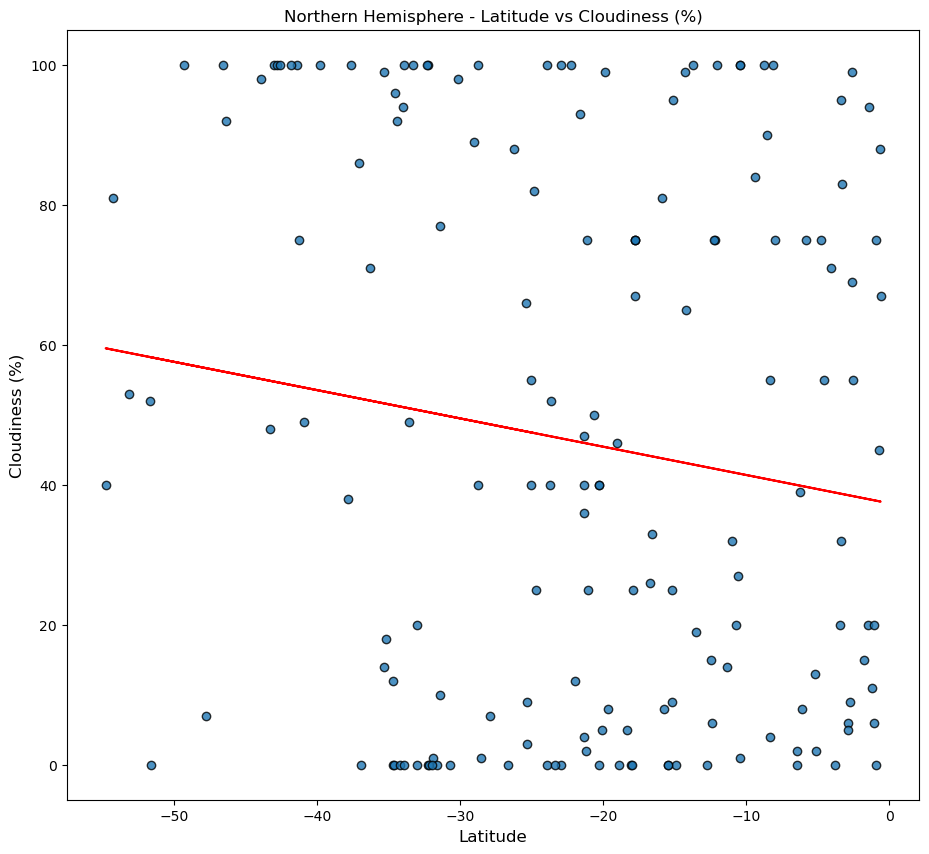

In [28]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
plot_linear_regression(x_values, y_values, "Latitude", "Cloudiness (%)", "Northern",(10,10))

plt.savefig("./output_data/southern_lat_vs_cloud.png", bbox_inches="tight")
plt.show()

**Discussion about the linear relationship:** The data suggest very weak negative correlation between cloudiness and latitudes of the plots measured.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.012801459365359938


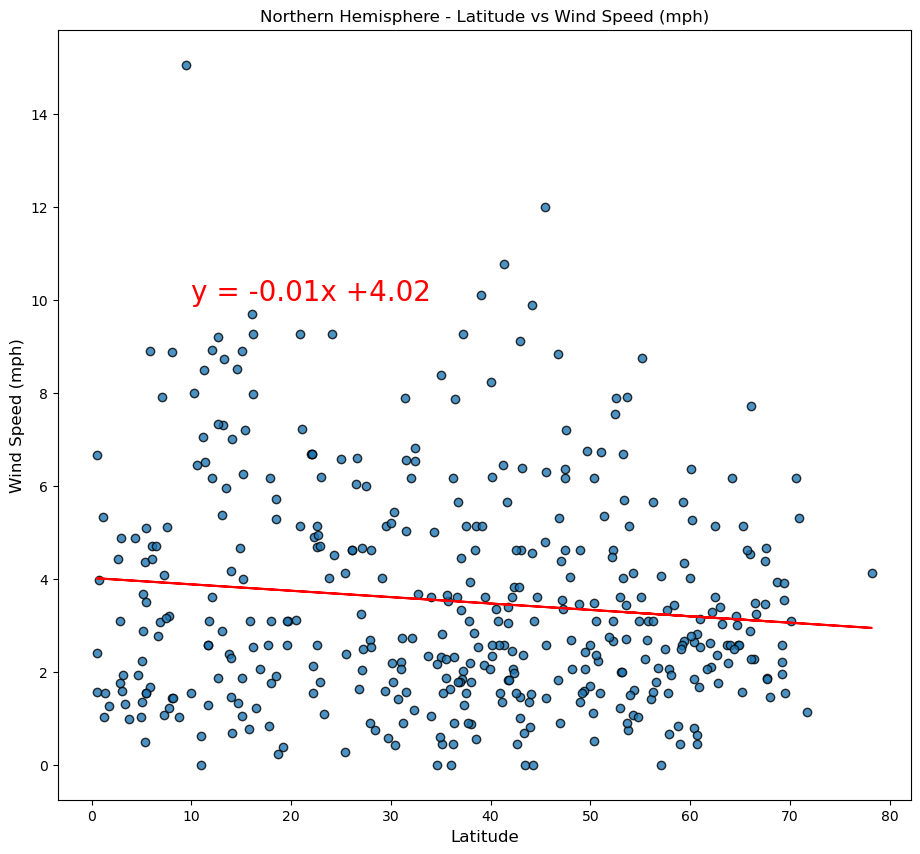

In [29]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
plot_linear_regression(x_values, y_values, "Latitude", "Wind Speed (mph)", "Northern",(10,10))

plt.savefig("./output_data/northern_lat_vs_windspeed.png", bbox_inches="tight")
plt.show()

The r-squared is: 0.041078872479409265


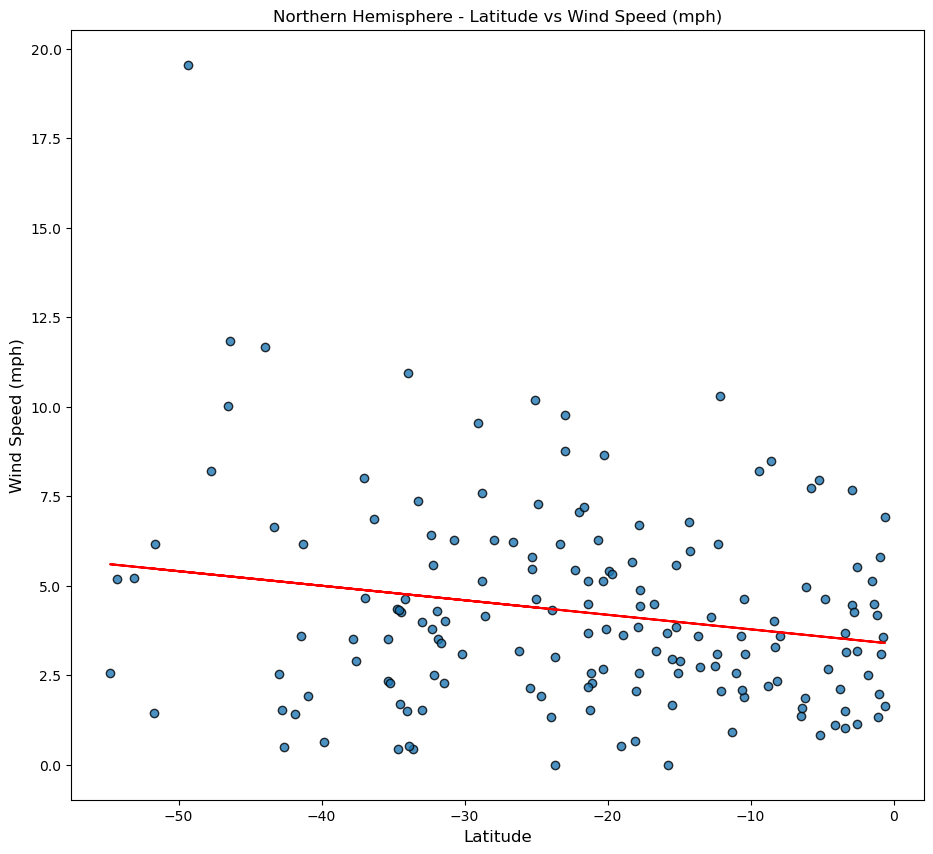

In [30]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
plot_linear_regression(x_values, y_values, "Latitude", "Wind Speed (mph)", "Northern",(10,10))

plt.savefig("./output_data/southern_lat_vs_windspeed.png", bbox_inches="tight")
plt.show()

**Discussion about the linear relationship:** The data shows very weak negative correlation of wind speed vs latitudes on both hemispheres of the world.